<a href="https://colab.research.google.com/github/avi78/Handwritten_digits_recognition/blob/main/AI_ML_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digits Recognition using CNN architecture (varying different activation functions) -

Report :

Docs - https://docs.google.com/document/d/10dQIx-TFmC4gnPPLYFmi35OcGIEGSCG1/edit?usp=sharing&ouid=116639405212533782249&rtpof=true&sd=true

Pdf version - https://drive.google.com/file/d/18-zsCQS5lEkENxsN1_4_qZY_tzXrXz9E/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pytorch
import torch

#  Adding Torch functionalities so that it can be used for building CNN Model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torch.utils.data as data_utils

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using the GPU...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using the CPU...")

GPU is not available. Using the CPU...


In [ ]:
#Reading data into pandas dataframe.

data_sets = "/content/drive/MyDrive/TMNIST_Data.csv"
data = pd.read_csv(data_sets)

In [ ]:
# Displaying first rows of dataset
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Determining Shape and Number of Sample in the Dataset

print(f"The Shape of the Dataframe is: {data.shape}") #Number of Samples, Number of Pixels(Features)
print(f"Number of Samples in the Dataset: {data.shape[0]}")

The Shape of the Dataframe is: (29900, 786)
Number of Samples in the Dataset: 29900


In [ ]:
# Number of unique character in the Dataset
print(f"Number of unique characters present in the Dataset: {len(data.labels.unique())}")

Number of unique characters present in the Dataset: 10


In [ ]:
# Label distribution
data.labels.value_counts()

2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: labels, dtype: int64

In [ ]:
#Dropping redundant coloums like names and labels from the training frames and keeping only pixel values
X = data.drop(columns = {'names', 'labels'})/255
X = X.values.reshape(X.shape[0], 1, 28, 28)
y = data[['labels']].values.reshape((-1,))

In [ ]:
#split data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Convert X_train, X_test, y_train, and y_test to PyTorch tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [ ]:
#printing shape
print(X_train.shape, y_train.shape)

torch.Size([23920, 1, 28, 28]) torch.Size([23920])


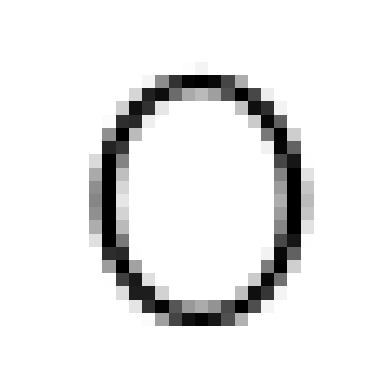

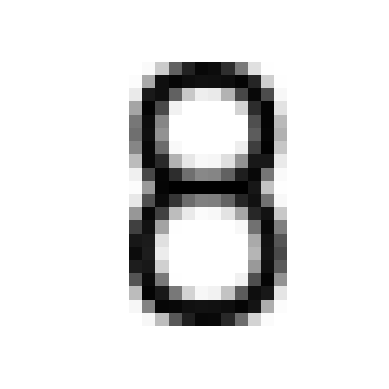

In [ ]:
def visualize_image(data):

    # Display the image using matplotlib's imshow() function
    plt.imshow(data[0], cmap='gray_r')

    # Turn off the axis display in the plot
    plt.axis("off")

    # Show the plot with the displayed image
    plt.show()

# Call the visualize_image() function with the first image in X_train dataset
visualize_image(X_train[1])
visualize_image(X_train[2])

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
# Create a training dataset from X_train and y_train
train = data_utils.TensorDataset(X_train, y_train)
# Create a testing dataset from X_test and y_test
test = data_utils.TensorDataset(X_test, y_test)

In [ ]:
# Create a training data loader from the train dataset
# with a batch size of 128 and shuffling the data
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

# Create a testing data loader from the test dataset
# with a batch size of 128 and shuffling the data
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [ ]:
#Printing input size of an iteration of training
for images, labels in train_loader:
    print(images.shape, labels.shape)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(images.shape, labels.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([1

In [ ]:
# Checking the size of the batch and labels from the training data loader
for images, labels in train_loader:
    print("Batch size (images):", images.shape)
    print("Batch size (labels):", labels.shape)
    break  # After printing the first batch, we break out of the loop

# Alternatively, we can directly fetch one batch from the data loader
data_iter = iter(train_loader)
images, labels = next(data_iter)
print("Directly fetched batch - images:", images.shape)
print("Directly fetched batch - labels:", labels.shape)

Batch size (images): torch.Size([128, 1, 28, 28])
Batch size (labels): torch.Size([128])
Directly fetched batch - images: torch.Size([128, 1, 28, 28])
Directly fetched batch - labels: torch.Size([128])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)     # First convolutional layer with input channels=1, output channels=32, and kernel size=3x3
        self.conv2 = nn.Conv2d(32, 64, 3)    # Second convolutional layer with input channels=32, output channels=64, and kernel size=3x3
        self.pool = nn.MaxPool2d(2, 2)       # Max pooling layer with kernel size=2x2 and stride=2
        self.fc1 = nn.Linear(64 * 12 * 12, 128)  # Fully connected layer with input size of 64x12x12 (output from previous layers) and output size of 128
        self.fc2 = nn.Linear(128, 10)        # Fully connected layer with input size of 128 and output size of 10 (for 10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))            # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(F.relu(self.conv2(x))) # Apply ReLU activation to the output of the second convolutional layer, then perform max pooling
        x = x.view(-1, 64 * 12 * 12)         # Flatten the tensor to a 1D vector
        x = F.relu(self.fc1(x))              # Apply ReLU activation to the output of the first fully connected layer
        x = self.fc2(x)                      # Output from the second fully connected layer (logits)
        return x

net = Net()                               # Create an instance of the neural network model
net.to(device)                           # Move the model to the specified device (e.g., GPU or CPU)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [ ]:
net = net.float()

In [ ]:
epoch_num = 0
actual_loss = 0.0
accuracy = 0.0

In [ ]:
#training model with 30 epochs

num_epochs = 30

# Create lists to store epoch number, loss, and accuracy for each epoch
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(num_epochs):
    print(f'Starting Epoch: {epoch + 1}...')

    running_loss = 0.0   # Initialize running loss to 0 for each epoch

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)    # Move inputs to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)    # Move labels to the specified device

        optimizer.zero_grad()        # Zero the gradients of the optimizer

        outputs = net(inputs.float())   # Forward pass to get predicted outputs from the model
        loss = criterion(outputs,labels)  # Compute the loss between predicted outputs and ground truth labels
        loss.backward()                 # Backward pass to compute gradients
        optimizer.step()                # Update model weights using the optimizer

        running_loss += loss.item()   # Add the current batch loss to the running loss for this epoch
        if i % 50 == 49:
            correct = 0
            total = 0

            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    images = images.to(device)    # Move images to the specified device
                    labels = labels.to(device)    # Move labels to the specified device
                    outputs = net(images.float())  # Forward pass to get predicted outputs from the model

                    _, predicted = torch.max(outputs.data, dim = 1)   # Get predicted labels with maximum probability
                    total += labels.size(0)   # Update total number of images
                    correct += (predicted == labels).sum().item()   # Update correct predictions count

                accuracy = 100 * correct / total   # Calculate accuracy for this epoch
                actual_loss = running_loss / 50   # Calculate average loss for this epoch
                epoch_num = epoch + 1   # Get current epoch number
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy: {accuracy:.3f}%')

    epoch_log.append(epoch_num)   # Append epoch number to the epoch log
    loss_log.append(actual_loss)   # Append average loss to the loss log
    accuracy_log.append(accuracy)   # Append accuracy to the accuracy log


print('Training Completed.')


Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 0.638, Test Accuracy: 94.766%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.815, Test Accuracy: 96.472%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.936, Test Accuracy: 97.324%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.066, Test Accuracy: 97.993%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.125, Test Accuracy: 98.043%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.180, Test Accuracy: 98.595%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, Loss: 0.033, Test Accuracy: 98.662%
Epoch: 3, Mini-Batches Completed: 100, Loss: 0.066, Test Accuracy: 98.629%
Epoch: 3, Mini-Batches Completed: 150, Loss: 0.103, Test Accuracy: 98.579%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, Loss: 0.014, Test Accuracy: 98.813%
Epoch: 4, Mini-Batches Completed: 100, Loss: 0.043, Test Accuracy: 98.395%
Epoch: 4, Mini-Batches Completed: 150, Loss: 0.067, Test Accuracy: 98.896%
Starting Epoch: 5...

In [ ]:
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
correct = 0   # Initialize count of correct predictions to 0
total = 0     # Initialize count of total predictions to 0

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device
        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        _, predicted = torch.max(outputs.data, 1)   # Get predicted labels with maximum probability
        label_size = labels.size(0)   # Get the number of labels in the current batch
        total += label_size   # Update total count of predictions
        correct += (predicted == labels).sum().item()   # Update count of correct predictions by summing up correct predictions in the current batch

accuracy = 100 * correct / total   # Calculate accuracy by dividing correct predictions by total predictions and multiplying by 100 to get percentage

print(f'Accuracy of the network on test images: {accuracy:.3}%')

Accuracy of the network on test images: 99.3%


Actual Label: 8, Predicted Label: 8


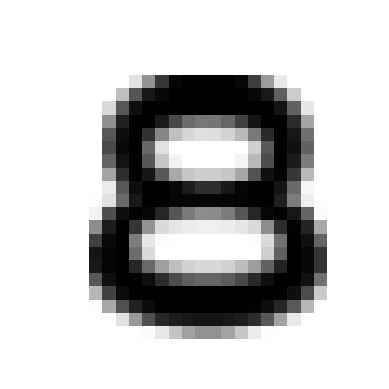

Actual Label: 9, Predicted Label: 9


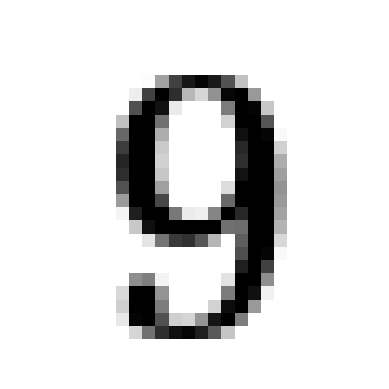

Actual Label: 6, Predicted Label: 6


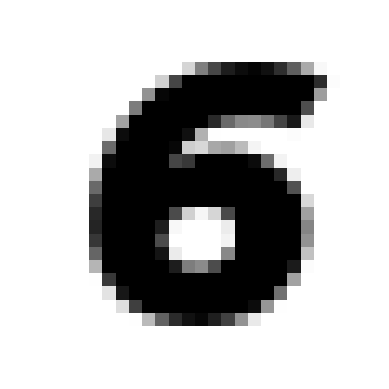

Actual Label: 4, Predicted Label: 4


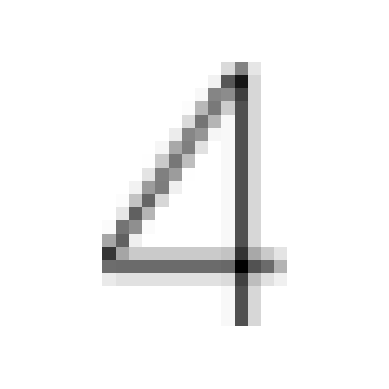

Actual Label: 2, Predicted Label: 2


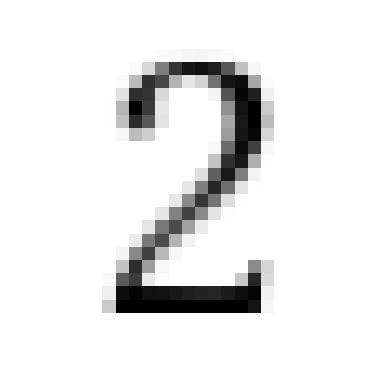

Actual Label: 1, Predicted Label: 1


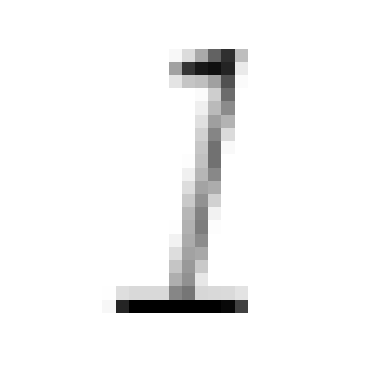

Actual Label: 7, Predicted Label: 7


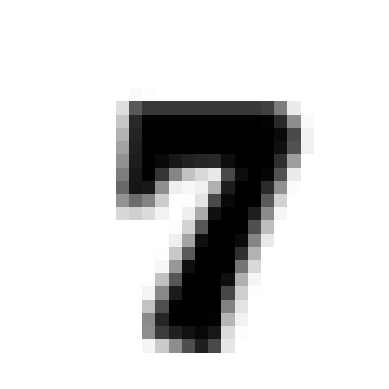

In [ ]:
net.eval()   # Set the model to evaluation mode, which disables dropout and batch normalization

num_images = 7  # Number of images to visualize

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device

        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        predictions = torch.argmax(outputs, dim=1)   # Get predicted labels with maximum probability

        for i in range(data[0].shape[0]):   # Loop through the images in the current batch
            pred = predictions[i].item()   # Get the predicted label for the current image
            label = labels[i]   # Get the actual label for the current image
            if(num_images > 0):   # Check if the number of images to visualize is greater than 0
                print(f'Actual Label: {pred}, Predicted Label: {label}')   # Print the actual and predicted label for the current image
                img = np.reshape(images[i].cpu().numpy(),[1,28,28])   # Convert the image tensor to a NumPy array and reshape it to [1, 28, 28] size
                visualize_image(img)   # Visualize the image using a custom function (e.g., visualize_image)
                num_images -= 1   # Decrement the number of images to visualize by 1


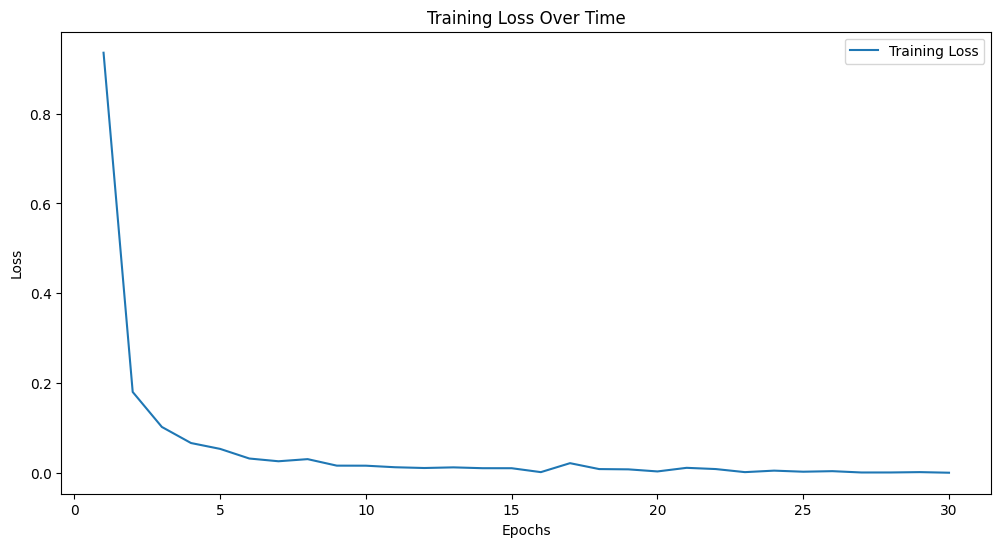

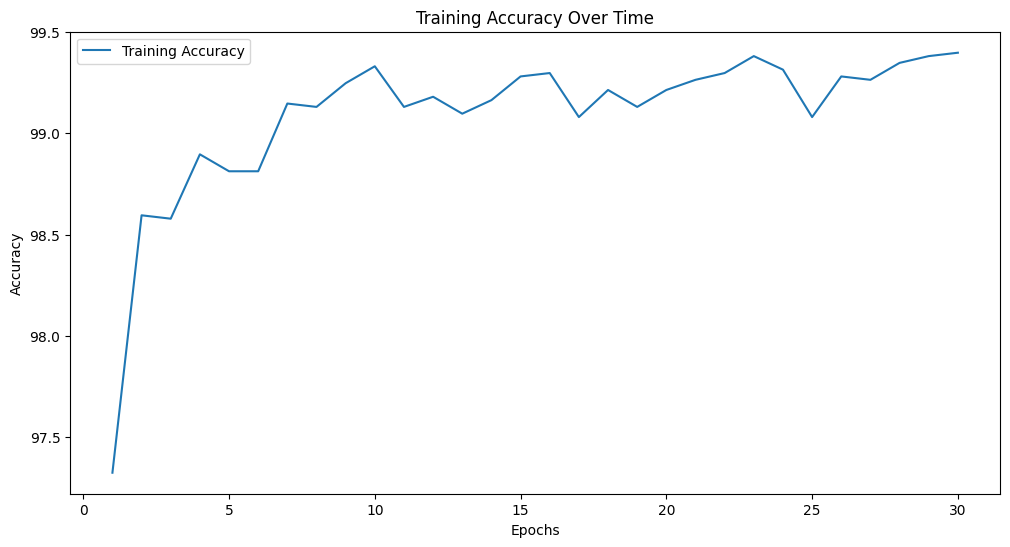

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, loss_log, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, accuracy_log, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store predicted labels with dtype long and device CPU
label_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store actual labels with dtype long and device CPU

with torch.no_grad():   # Turn off gradient computation during inference
    for i, (inputs, classes) in enumerate(test_loader):   # Iterate over the test data loader
        inputs = inputs.to(device)   # Move inputs to the specified device (e.g., CPU or GPU)
        classes = classes.to(device)   # Move actual labels to the specified device
        outputs = net(inputs.float())   # Pass inputs through the network to get predicted outputs
        _, preds = torch.max(outputs, 1)   # Get the predicted labels by finding the indices of maximum values along the second dimension (class probabilities)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])   # Concatenate predicted labels to the pred_list tensor, reshaping to 1D and moving to CPU
        label_list = torch.cat([label_list, classes.view(-1).cpu()])   # Concatenate actual labels to the label_list tensor, reshaping to 1D and moving to CPU

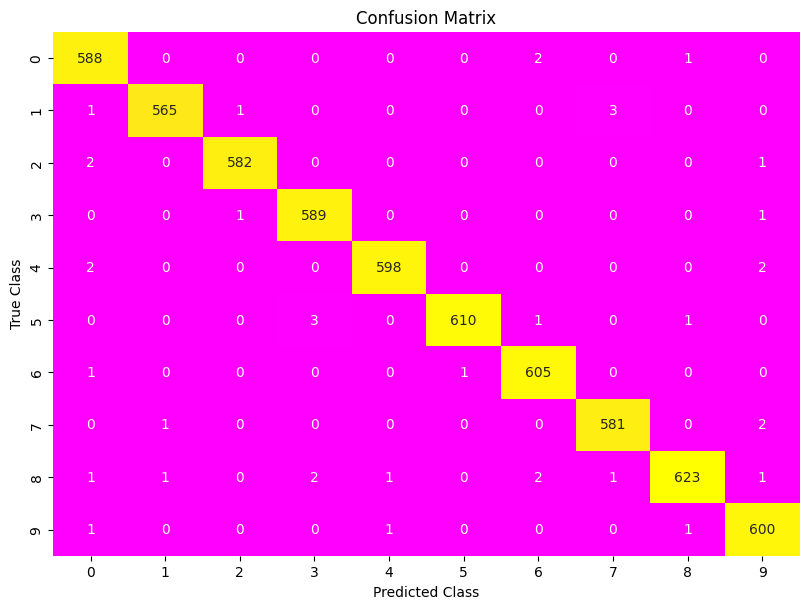

In [ ]:
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())   # Compute the confusion matrix using predicted and actual labels converted to NumPy arrays
class_names = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)   # Define the class names as a tuple of integers from 0 to 9
dataframe = pd.DataFrame(conf_mat, index=class_names, columns=class_names)   # Create a DataFrame from the confusion matrix, with class names as row and column indices
#plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None,cmap="spring",fmt="d")

plt.title("Confusion Matrix"), plt.tight_layout()

plt.ylabel("True Class"),
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

# Compute precision, accuracy, F1 score, and recall
precision = precision_score(label_list.numpy(), pred_list.numpy(), average='weighted')
accuracy = accuracy_score(label_list.numpy(), pred_list.numpy())
f1 = f1_score(label_list.numpy(), pred_list.numpy(), average='weighted')
recall = recall_score(label_list.numpy(), pred_list.numpy(), average='weighted')

# Print the metrics
print(f'Precision: {precision:.3f}')
print(f'Accuracy: {accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'Recall: {recall:.3f}')


Precision: 0.993
Accuracy: 0.993
F1 Score: 0.993
Recall: 0.993


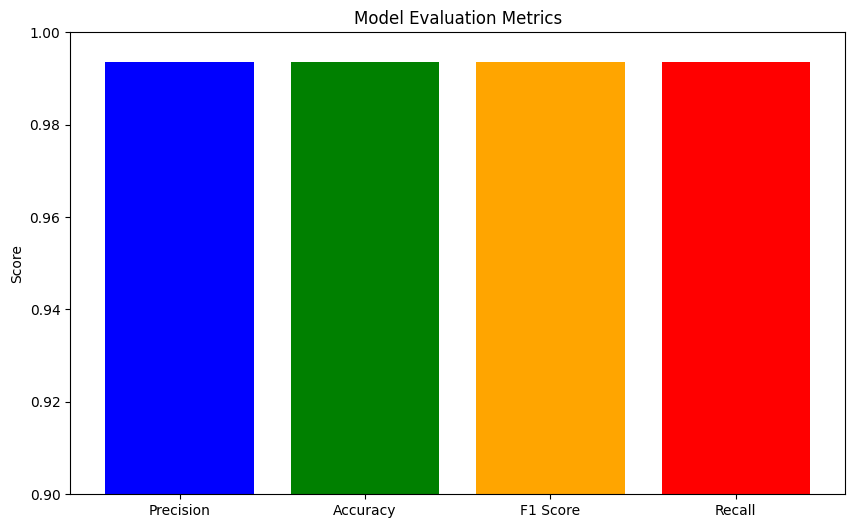

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code)

# Compute precision, accuracy, F1 score, and recall
precision = precision_score(label_list.numpy(), pred_list.numpy(), average='weighted')
accuracy = accuracy_score(label_list.numpy(), pred_list.numpy())
f1 = f1_score(label_list.numpy(), pred_list.numpy(), average='weighted')
recall = recall_score(label_list.numpy(), pred_list.numpy(), average='weighted')

# Plot the metrics
metrics_names = ['Precision', 'Accuracy', 'F1 Score', 'Recall']
metrics_values = [precision, accuracy, f1, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits based on your metric values
plt.show()


In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, activation_function='relu'):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

        # Choose activation function based on the provided parameter
        if activation_function == 'relu':
            self.activation = F.relu
        elif activation_function == 'leaky_relu':
            self.activation = F.leaky_relu
        elif activation_function == 'elu':
            self.activation = F.elu
        elif activation_function == 'sigmoid':
            self.activation = torch.sigmoid
        elif activation_function == 'tanh':
            self.activation = torch.tanh
        elif activation_function == 'linear':
            self.activation = lambda x: x  # Linear activation, no activation function
        else:
            raise ValueError(f"Unsupported activation function: {activation_function}")

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Example with ReLU activation function
net_relu = Net(activation_function='relu')

# Example with Sigmoid activation function
net_sigmoid = Net(activation_function='sigmoid')


In [ ]:
import torch.optim as optim

# List of activation functions to try
activation_functions = ['relu', 'leaky_relu', 'elu', 'sigmoid', 'tanh', 'linear']

# Number of epochs
num_epochs = 20

# Create lists to store results
results = []

for activation_function in activation_functions:
    # Create an instance of the neural network model with the specified activation function
    net = Net(activation_function=activation_function)
    net.to(device)

    # Choose optimizer and criterion
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Create lists to store epoch number, loss, and accuracy for each epoch
    epoch_log = []
    loss_log = []
    accuracy_log = []

    for epoch in range(num_epochs):
        print(f'Starting Epoch {epoch + 1} with {activation_function} activation...')

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 50 == 49:
                correct = 0
                total = 0

                with torch.no_grad():
                    for data in test_loader:
                        images, labels = data
                        images = images.to(device)
                        labels = labels.to(device)
                        outputs = net(images.float())

                        _, predicted = torch.max(outputs.data, dim=1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                    accuracy = 100 * correct / total
                    actual_loss = running_loss / 50
                    epoch_num = epoch + 1

                    epoch_log.append(epoch_num)
                    loss_log.append(actual_loss)
                    accuracy_log.append(accuracy)

    results.append({
        'activation_function': activation_function,
        'epochs': epoch_log,
        'loss': loss_log,
        'accuracy': accuracy_log
    })

# Print or analyze the results as needed
for result in results:
    print(f"Activation Function: {result['activation_function']}")
    print(f"Epochs: {result['epochs']}")
    print(f"Final Loss: {result['loss'][-1]:.3f}")
    print(f"Final Accuracy: {result['accuracy'][-1]:.3f}%")
    print("\n")


Starting Epoch 1 with relu activation...
Starting Epoch 2 with relu activation...
Starting Epoch 3 with relu activation...
Starting Epoch 4 with relu activation...
Starting Epoch 5 with relu activation...
Starting Epoch 6 with relu activation...
Starting Epoch 7 with relu activation...
Starting Epoch 8 with relu activation...
Starting Epoch 9 with relu activation...
Starting Epoch 10 with relu activation...
Starting Epoch 11 with relu activation...
Starting Epoch 12 with relu activation...
Starting Epoch 13 with relu activation...
Starting Epoch 14 with relu activation...
Starting Epoch 15 with relu activation...
Starting Epoch 16 with relu activation...
Starting Epoch 17 with relu activation...
Starting Epoch 18 with relu activation...
Starting Epoch 19 with relu activation...
Starting Epoch 20 with relu activation...
Starting Epoch 1 with leaky_relu activation...
Starting Epoch 2 with leaky_relu activation...
Starting Epoch 3 with leaky_relu activation...
Starting Epoch 4 with leaky_

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

activation_functions = ['relu', 'leaky_relu', 'elu', 'sigmoid', 'tanh', 'linear']


# Number of epochs
num_epochs = 10

# Create lists to store results
results = []

for activation_function in activation_functions:
    # Create an instance of the neural network model with the specified activation function
    net = Net(activation_function=activation_function)
    net.to(device)

    # Choose optimizer and criterion
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Create lists to store epoch number, loss, and accuracy for each epoch
    epoch_log = []
    loss_log = []
    accuracy_log = []

    for epoch in range(num_epochs):
        print(f'Starting Epoch {epoch + 1} with {activation_function} activation...')

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 50 == 49:
                correct = 0
                total = 0
                all_preds = []
                all_labels = []

                with torch.no_grad():
                    for data in test_loader:
                        images, labels = data
                        images = images.to(device)
                        labels = labels.to(device)
                        outputs = net(images.float())

                        _, predicted = torch.max(outputs.data, dim=1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                        all_preds.extend(predicted.cpu().numpy())
                        all_labels.extend(labels.cpu().numpy())

                    accuracy = accuracy_score(all_labels, all_preds)
                    precision = precision_score(all_labels, all_preds, average='weighted')
                    recall = recall_score(all_labels, all_preds, average='weighted')
                    f1 = f1_score(all_labels, all_preds, average='weighted')
                    confusion_mat = confusion_matrix(all_labels, all_preds)

                    actual_loss = running_loss / 50
                    epoch_num = epoch + 1

                    epoch_log.append(epoch_num)
                    loss_log.append(actual_loss)
                    accuracy_log.append(accuracy)

    results.append({
        'activation_function': activation_function,
        'epochs': epoch_log,
        'loss': loss_log,
        'accuracy': accuracy_log,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': confusion_mat
    })

    # Save the model
    model_path = f'./{activation_function}_net.pth'
    torch.save(net.state_dict(), model_path)

# Print or analyze the results as needed
for result in results:
    print(f"Activation Function: {result['activation_function']}")
    print(f"Epochs: {result['epochs']}")
    print(f"Final Loss: {result['loss'][-1]:.3f}")
    print(f"Final Accuracy: {result['accuracy'][-1]:.3f}%")
    print(f"Final Precision: {result['precision']:.3f}")
    print(f"Final Recall: {result['recall']:.3f}")
    print(f"Final F1 Score: {result['f1']:.3f}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Starting Epoch 1 with relu activation...
Starting Epoch 2 with relu activation...
Starting Epoch 3 with relu activation...
Starting Epoch 4 with relu activation...
Starting Epoch 5 with relu activation...
Starting Epoch 6 with relu activation...
Starting Epoch 7 with relu activation...
Starting Epoch 8 with relu activation...
Starting Epoch 9 with relu activation...
Starting Epoch 10 with relu activation...
Starting Epoch 1 with leaky_relu activation...
Starting Epoch 2 with leaky_relu activation...
Starting Epoch 3 with leaky_relu activation...
Starting Epoch 4 with leaky_relu activation...
Starting Epoch 5 with leaky_relu activation...
Starting Epoch 6 with leaky_relu activation...
Starting Epoch 7 with leaky_relu activation...
Starting Epoch 8 with leaky_relu activation...
Starting Epoch 9 with leaky_relu activation...
Starting Epoch 10 with leaky_relu activation...
Starting Epoch 1 with elu activation...
Starting Epoch 2 with elu activation...
Starting Epoch 3 with elu activation..

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

Starting Epoch 1 with relu activation...
Starting Epoch 2 with relu activation...
Starting Epoch 3 with relu activation...
Starting Epoch 1 with leaky_relu activation...
Starting Epoch 2 with leaky_relu activation...
Starting Epoch 3 with leaky_relu activation...
Starting Epoch 1 with elu activation...
Starting Epoch 2 with elu activation...
Starting Epoch 3 with elu activation...
Starting Epoch 1 with sigmoid activation...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Starting Epoch 2 with sigmoid activation...
Starting Epoch 3 with sigmoid activation...
Starting Epoch 1 with tanh activation...
Starting Epoch 2 with tanh activation...
Starting Epoch 3 with tanh activation...
Starting Epoch 1 with linear activation...
Starting Epoch 2 with linear activation...
Starting Epoch 3 with linear activation...
Activation Function: relu
Epochs: [1, 2, 3]
Final Loss: 0.035
Final Accuracy: 0.988%
Final Precision: 0.988
Final Recall: 0.988
Final F1 Score: 0.988
Validation Loss: 0.047
Confusion Matrix:
[[585   1   0   0   1   0   2   0   2   0]
 [  2 561   2   0   0   0   0   5   0   0]
 [  0   2 581   0   2   0   0   0   0   0]
 [  0   0   1 586   0   0   0   3   0   1]
 [  0   0   0   1 601   0   0   0   0   0]
 [  0   1   0   3   1 607   1   1   1   0]
 [  1   0   0   0   0   3 601   0   1   1]
 [  0   4   0   0   0   0   0 577   0   3]
 [  2   4   1   3   2   2   5   2 611   0]
 [  1   0   0   3   2   0   0   0   0 597]]



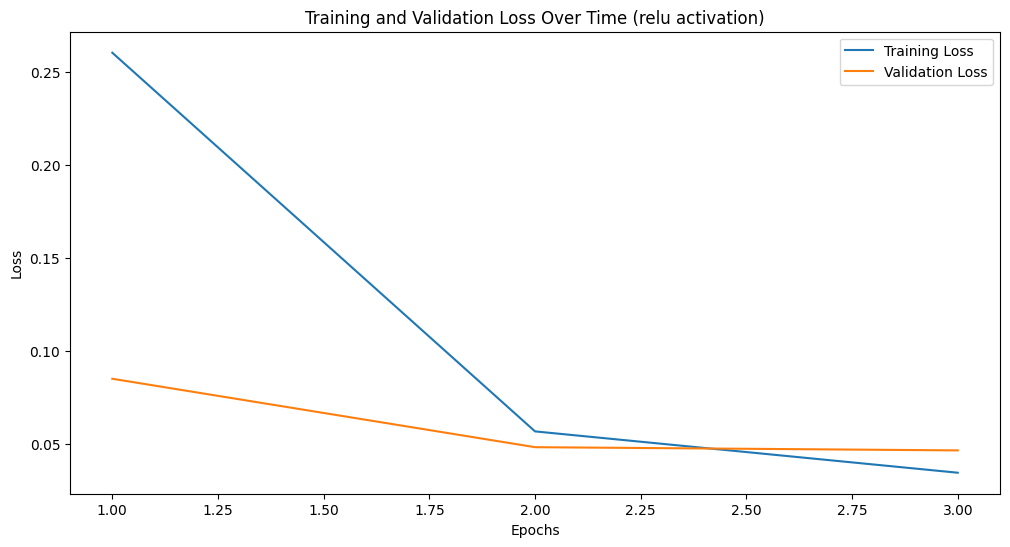

Activation Function: leaky_relu
Epochs: [1, 2, 3]
Final Loss: 0.034
Final Accuracy: 0.987%
Final Precision: 0.987
Final Recall: 0.987
Final F1 Score: 0.987
Validation Loss: 0.051
Confusion Matrix:
[[586   0   0   0   0   0   2   0   1   2]
 [  2 563   5   0   0   0   0   0   0   0]
 [  2   0 583   0   0   0   0   0   0   0]
 [  1   0   1 581   0   0   0   1   3   4]
 [  2   0   0   1 598   0   0   0   0   1]
 [  0   1   0   6   0 601   3   0   1   3]
 [  0   0   0   0   3   1 602   0   0   1]
 [  0   7   0   0   0   0   0 573   0   4]
 [  1   0   0   3   1   0   3   1 615   8]
 [  1   0   0   2   2   0   0   0   0 598]]



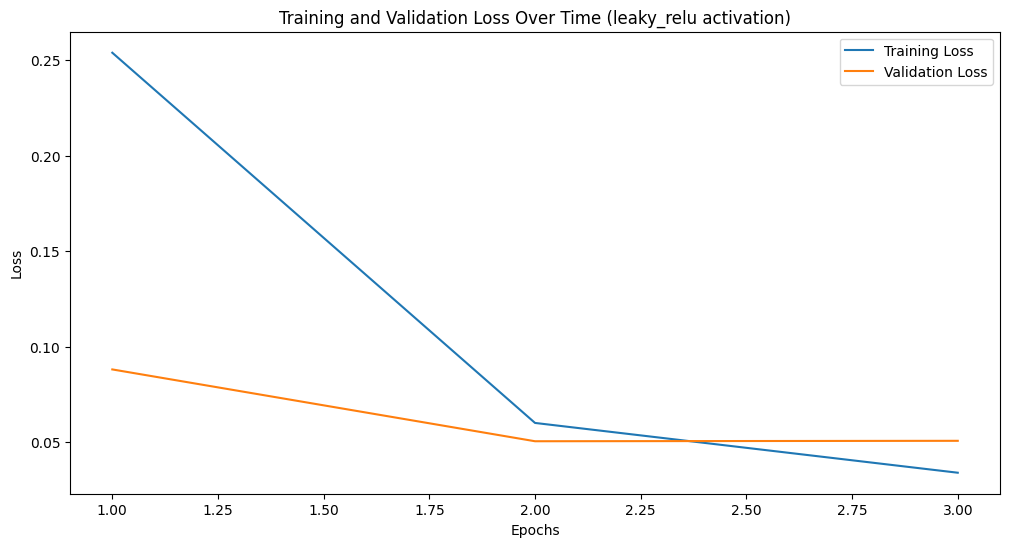

Activation Function: elu
Epochs: [1, 2, 3]
Final Loss: 0.032
Final Accuracy: 0.987%
Final Precision: 0.987
Final Recall: 0.987
Final F1 Score: 0.987
Validation Loss: 0.052
Confusion Matrix:
[[586   0   0   0   0   0   4   0   1   0]
 [  1 557   1   0   0   0   0  10   1   0]
 [  2   0 581   0   0   0   0   0   2   0]
 [  0   0   0 586   0   0   0   0   3   2]
 [  2   0   0   1 598   0   0   1   0   0]
 [  1   1   0   7   0 603   1   0   2   0]
 [  0   0   0   0   1   4 599   0   3   0]
 [  1   1   0   1   0   0   0 579   0   2]
 [  2   0   1   1   1   1   1   1 624   0]
 [  5   2   0   2   3   1   0   0   1 589]]



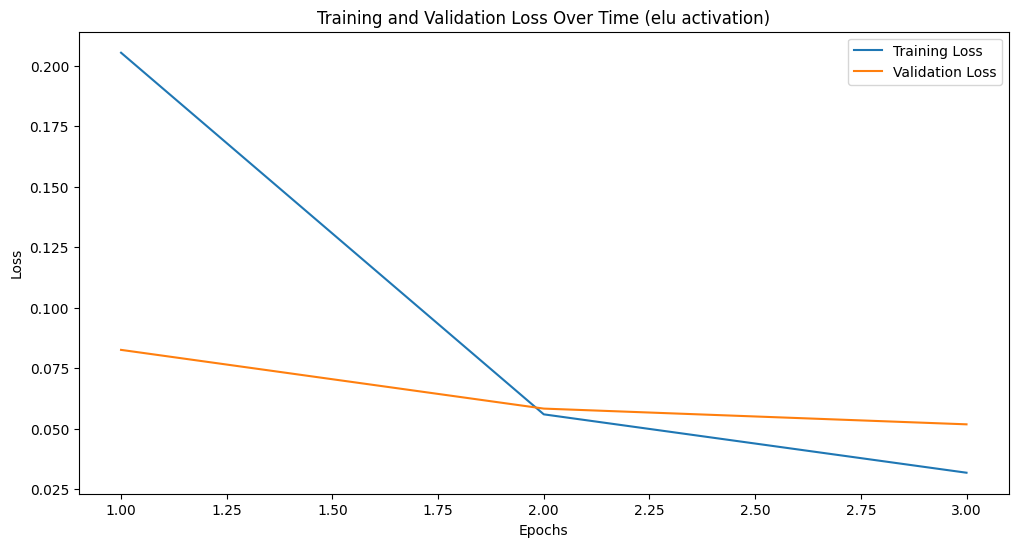

Activation Function: sigmoid
Epochs: [1, 2, 3]
Final Loss: 0.148
Final Accuracy: 0.969%
Final Precision: 0.969
Final Recall: 0.969
Final F1 Score: 0.969
Validation Loss: 0.128
Confusion Matrix:
[[565   2   5   0   1   1   5   0   4   8]
 [  1 546  10   3   1   0   1   8   0   0]
 [  0   2 579   0   0   0   0   2   2   0]
 [  1   4   3 573   1   2   0   2   4   1]
 [  1   1   1   1 596   0   2   0   0   0]
 [  1   3   2  15   0 584   2   2   4   2]
 [  5   0   1   1   3   5 580   0  11   1]
 [  0   2   2   0   0   0   0 574   1   5]
 [  1   2   3   3   0   1   1   3 615   3]
 [  3   2   0   4   6   0   0   3   1 584]]



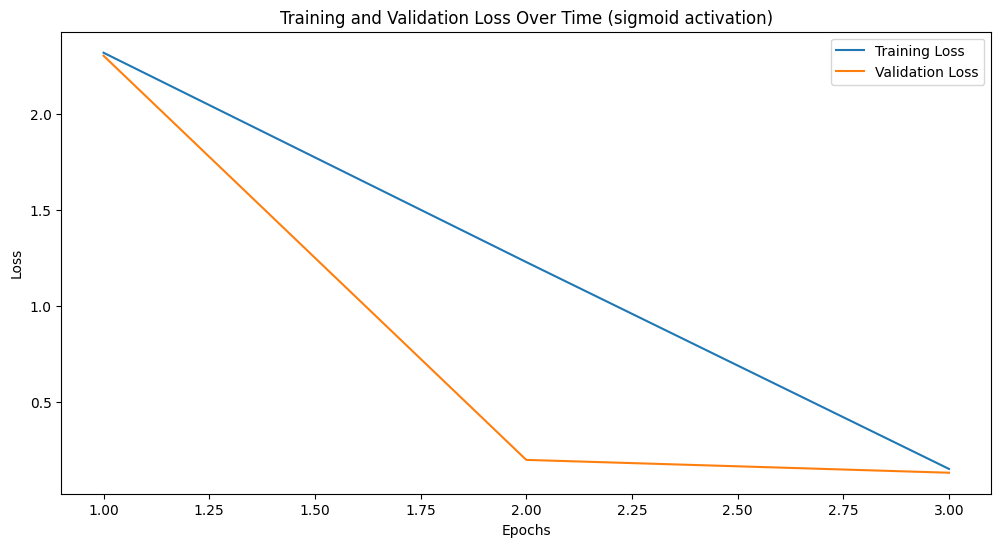

Activation Function: tanh
Epochs: [1, 2, 3]
Final Loss: 0.034
Final Accuracy: 0.987%
Final Precision: 0.987
Final Recall: 0.987
Final F1 Score: 0.987
Validation Loss: 0.047
Confusion Matrix:
[[584   0   0   0   0   1   4   0   1   1]
 [  2 563   3   0   1   0   0   1   0   0]
 [  0   2 579   2   0   0   0   1   1   0]
 [  1   0   0 585   1   1   0   0   1   2]
 [  2   1   0   1 597   0   1   0   0   0]
 [  1   1   0   7   0 603   2   0   1   0]
 [  0   0   0   0   0   4 598   0   4   1]
 [  0   5   0   1   0   0   0 575   0   3]
 [  0   0   1   2   1   2   2   1 623   0]
 [  3   0   0   5   2   0   0   0   0 593]]



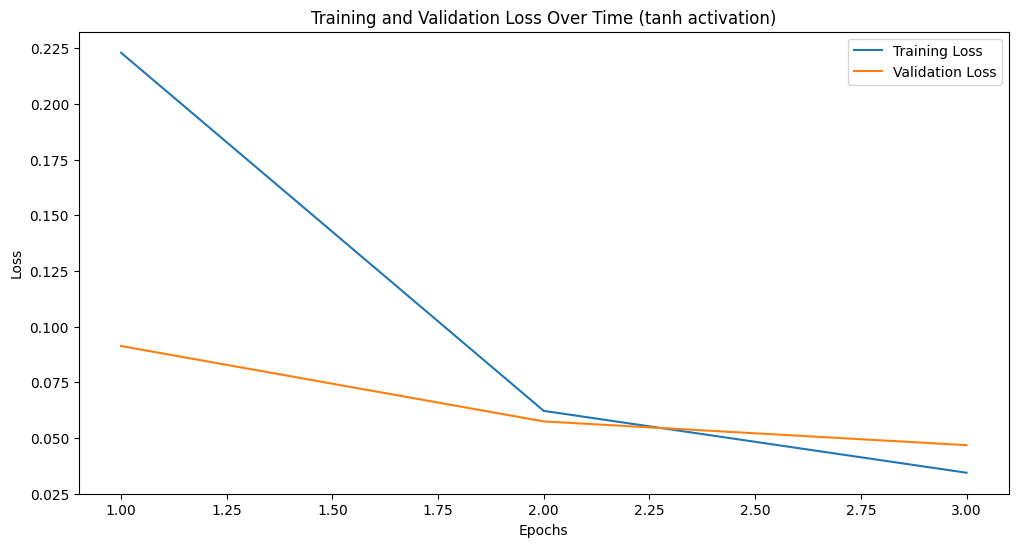

Activation Function: linear
Epochs: [1, 2, 3]
Final Loss: 0.052
Final Accuracy: 0.985%
Final Precision: 0.985
Final Recall: 0.985
Final F1 Score: 0.985
Validation Loss: 0.062
Confusion Matrix:
[[584   0   1   0   0   1   3   0   1   1]
 [  1 557   0   0   1   0   0  10   1   0]
 [  0   3 578   1   2   0   0   1   0   0]
 [  0   0   1 585   0   1   0   1   2   1]
 [  2   0   0   1 595   0   3   0   0   1]
 [  1   2   0   5   0 603   2   0   2   0]
 [  0   0   0   0   2   6 599   0   0   0]
 [  0   3   0   0   0   1   0 577   0   3]
 [  0   0   1   2   1   2   2   1 623   0]
 [  1   1   0   6   4   1   0   0   0 590]]



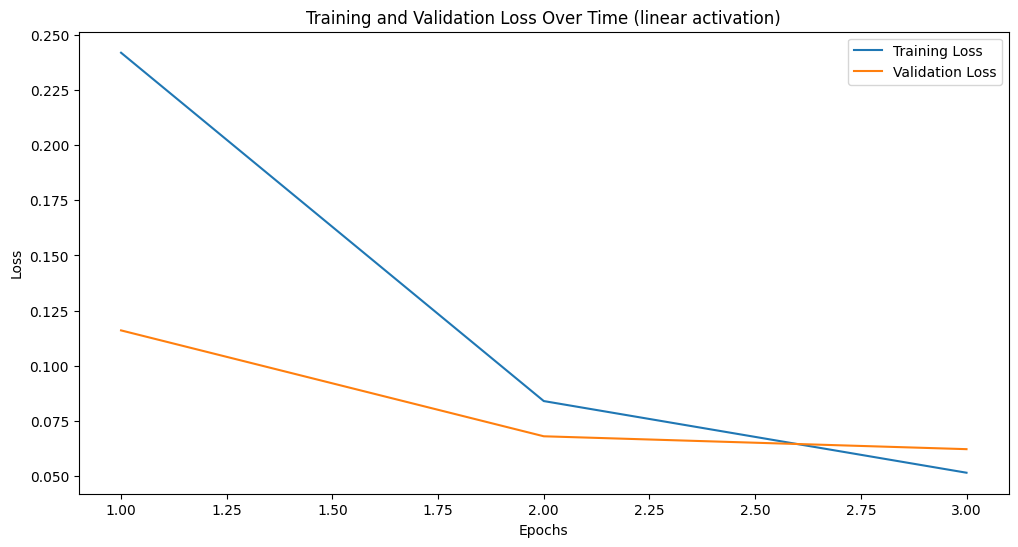

In [ ]:
activation_functions = ['relu', 'leaky_relu', 'elu', 'sigmoid', 'tanh', 'linear']

# Number of epochs
num_epochs = 3

# Create lists to store results
results = []

for activation_function in activation_functions:
    # Create an instance of the neural network model with the specified activation function
    net = Net(activation_function=activation_function)
    net.to(device)

    # Choose optimizer and criterion
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Create lists to store epoch number, loss, and accuracy for each epoch
    epoch_log = []
    loss_log = []
    accuracy_log = []
    val_loss_log = []  # For validation loss

    for epoch in range(num_epochs):
        print(f'Starting Epoch {epoch + 1} with {activation_function} activation...')

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate validation loss
        val_loss = 0.0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images = images.to(device)
                labels = labels.to(device)
                outputs = net(images.float())
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        # Calculate metrics
        correct = 0
        total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images = images.to(device)
                labels = labels.to(device)
                outputs = net(images.float())

                _, predicted = torch.max(outputs.data, dim=1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')
        confusion_mat = confusion_matrix(all_labels, all_preds)

        actual_loss = running_loss / len(train_loader)
        val_loss /= len(test_loader)

        epoch_num = epoch + 1

        epoch_log.append(epoch_num)
        loss_log.append(actual_loss)
        accuracy_log.append(accuracy)
        val_loss_log.append(val_loss)

    results.append({
        'activation_function': activation_function,
        'epochs': epoch_log,
        'loss': loss_log,
        'accuracy': accuracy_log,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': confusion_mat,
        'val_loss': val_loss_log
    })

    # Save the model
    model_path = f'./{activation_function}_net.pth'
    torch.save(net.state_dict(), model_path)

# Print or analyze the results as needed
for result in results:
    print(f"Activation Function: {result['activation_function']}")
    print(f"Epochs: {result['epochs']}")
    print(f"Final Loss: {result['loss'][-1]:.3f}")
    print(f"Final Accuracy: {result['accuracy'][-1]:.3f}%")
    print(f"Final Precision: {result['precision']:.3f}")
    print(f"Final Recall: {result['recall']:.3f}")
    print(f"Final F1 Score: {result['f1']:.3f}")
    print(f"Validation Loss: {result['val_loss'][-1]:.3f}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")

    # Plot training and validation loss over epochs
    plt.figure(figsize=(12, 6))
    plt.plot(result['epochs'], result['loss'], label='Training Loss')
    plt.plot(result['epochs'], result['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Over Time ({result["activation_function"]} activation)')
    plt.legend()
    plt.show()


In [ ]:
import graphviz

# Create a new directed graph
flowchart = graphviz.Digraph('HandwrittenDigitRecognition', format='png', engine='dot')

# Define nodes for each step
flowchart.node('DataCollection', 'Data Collection')
flowchart.node('DataPreprocessing', 'Data Preprocessing')
flowchart.node('ModelSelection', 'Model Selection')
flowchart.node('ModelTraining', 'Model Training')
flowchart.node('ModelEvaluation', 'Model Evaluation')
flowchart.node('HyperparameterTuning', 'Hyperparameter Tuning')
flowchart.node('Deployment', 'Deployment')
flowchart.node('MonitoringMaintenance', 'Monitoring and Maintenance')

# Define edges to represent the flow
flowchart.edge('DataCollection', 'DataPreprocessing')
flowchart.edge('DataPreprocessing', 'ModelSelection')
flowchart.edge('ModelSelection', 'ModelTraining')
flowchart.edge('ModelTraining', 'ModelEvaluation')
flowchart.edge('ModelEvaluation', 'HyperparameterTuning')
flowchart.edge('HyperparameterTuning', 'Deployment')
flowchart.edge('Deployment', 'MonitoringMaintenance')

# Save the flowchart as an image file
flowchart.render(filename='HandwrittenDigitRecognitionFlowchart', format='png', cleanup=True)

print("Flowchart generated successfully. Check the current directory for the image file.")


Flowchart generated successfully. Check the current directory for the image file.


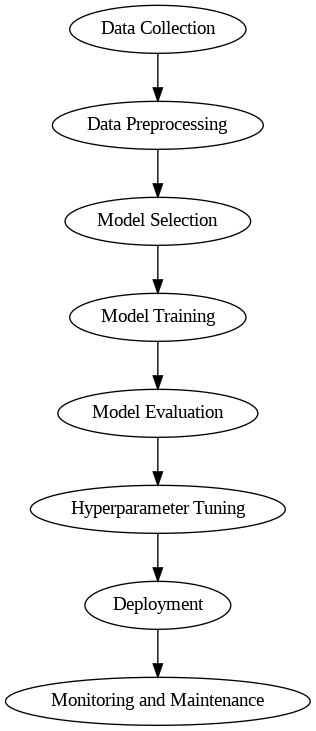

In [ ]:
from IPython.display import Image

# Display the generated flowchart image
Image(filename='HandwrittenDigitRecognitionFlowchart.png')


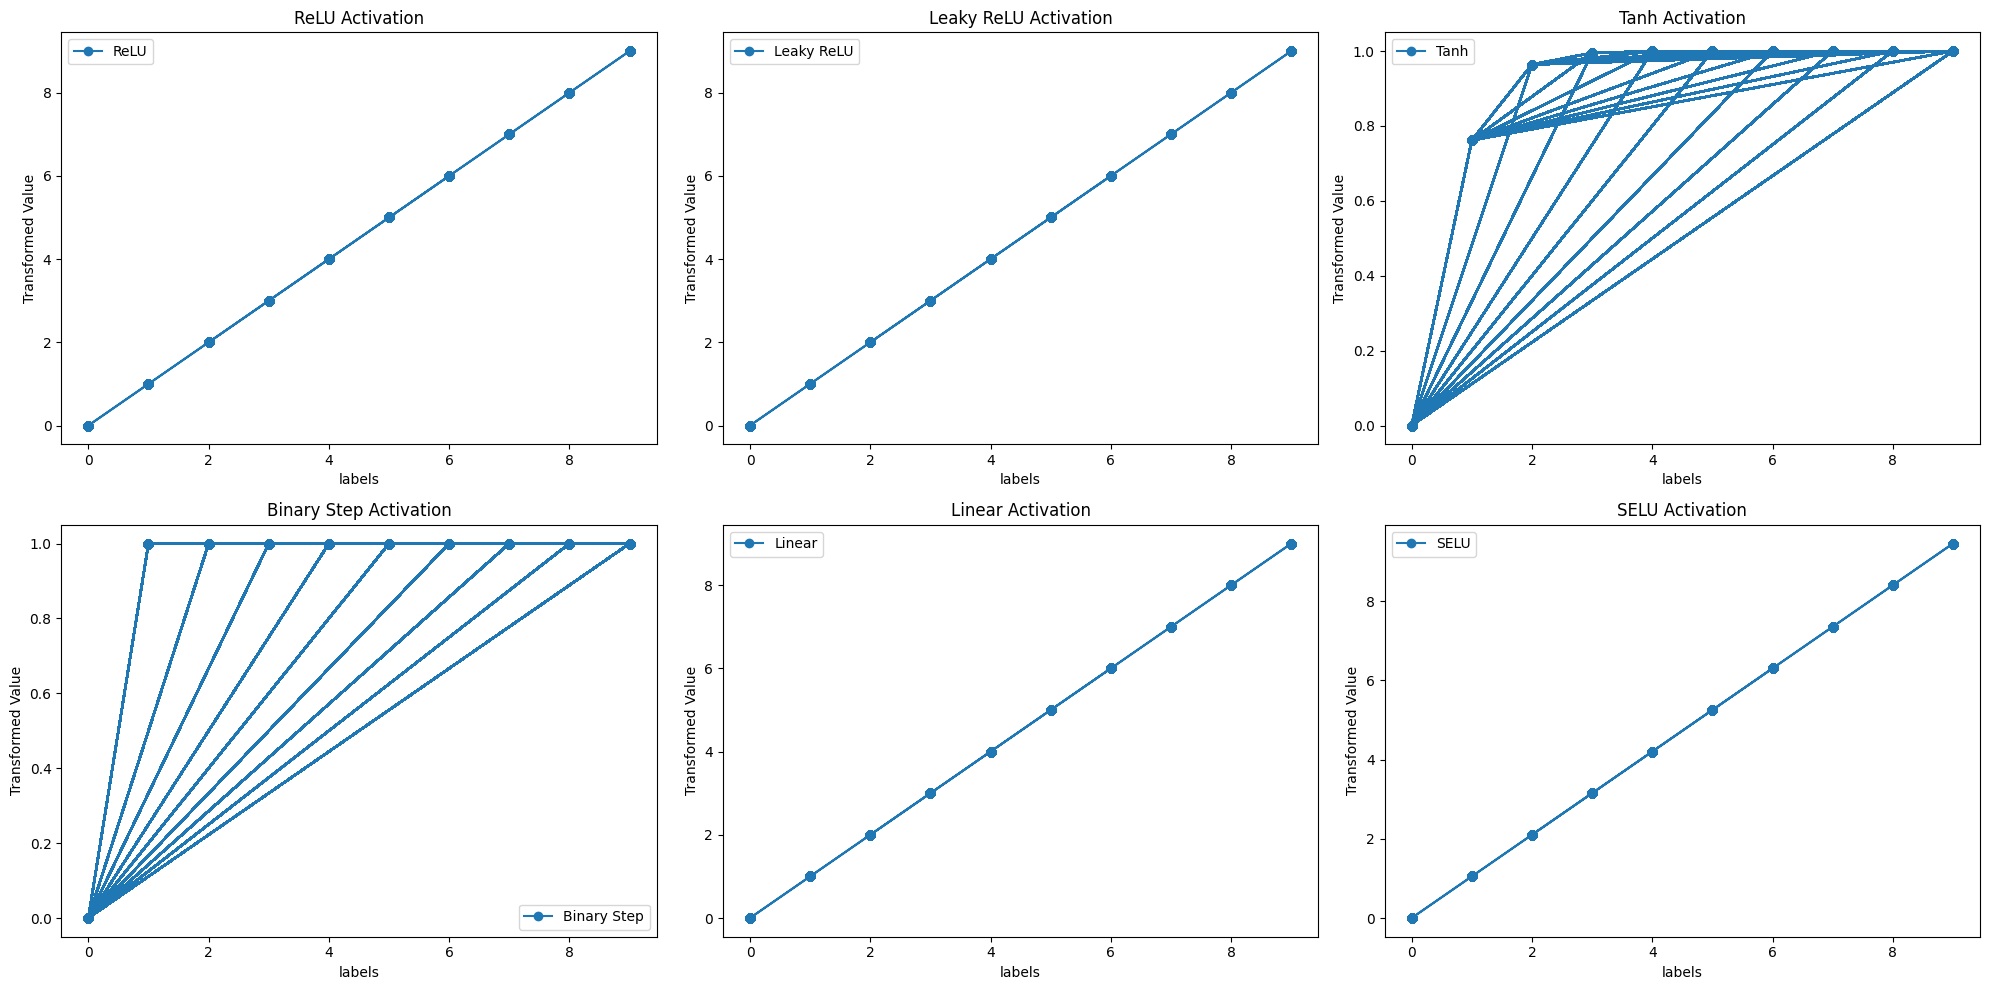

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_sets = "/content/drive/MyDrive/TMNIST_Data.csv"
data = pd.read_csv(data_sets)

# Remove rows with any null values
data_cleaned = data.dropna()

# Extract the 'labels' column
labels_column = 'labels'

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU activation
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Tanh activation
def tanh(x):
    return np.tanh(x)

# Binary Step activation
def binary_step(x):
    return np.where(x > 0, 1, 0)

# Linear activation
def linear(x):
    return x

# SELU activation
def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Apply activation functions to the 'labels' column in the cleaned dataset
data_cleaned['relu_transformed'] = relu(data_cleaned[labels_column])
data_cleaned['leaky_relu_transformed'] = leaky_relu(data_cleaned[labels_column])
data_cleaned['tanh_transformed'] = tanh(data_cleaned[labels_column])
data_cleaned['binary_step_transformed'] = binary_step(data_cleaned[labels_column])
data_cleaned['linear_transformed'] = linear(data_cleaned[labels_column])
data_cleaned['selu_transformed'] = selu(data_cleaned[labels_column])

# Visualize the results using line plots with markers
plt.figure(figsize=(20, 10))

# ReLU plot
plt.subplot(231)
plt.plot(data_cleaned[labels_column], data_cleaned['relu_transformed'], marker='o', label='ReLU')
plt.title('ReLU Activation')
plt.xlabel(labels_column)
plt.ylabel('Transformed Value')
plt.legend()

# Leaky ReLU plot
plt.subplot(232)
plt.plot(data_cleaned[labels_column], data_cleaned['leaky_relu_transformed'], marker='o', label='Leaky ReLU')
plt.title('Leaky ReLU Activation')
plt.xlabel(labels_column)
plt.ylabel('Transformed Value')
plt.legend()

# Tanh plot
plt.subplot(233)
plt.plot(data_cleaned[labels_column], data_cleaned['tanh_transformed'], marker='o', label='Tanh')
plt.title('Tanh Activation')
plt.xlabel(labels_column)
plt.ylabel('Transformed Value')
plt.legend()

# Binary Step plot
plt.subplot(234)
plt.plot(data_cleaned[labels_column], data_cleaned['binary_step_transformed'], marker='o', label='Binary Step')
plt.title('Binary Step Activation')
plt.xlabel(labels_column)
plt.ylabel('Transformed Value')
plt.legend()

# Linear plot
plt.subplot(235)
plt.plot(data_cleaned[labels_column], data_cleaned['linear_transformed'], marker='o', label='Linear')
plt.title('Linear Activation')
plt.xlabel(labels_column)
plt.ylabel('Transformed Value')
plt.legend()

# SELU plot
plt.subplot(236)
plt.plot(data_cleaned[labels_column], data_cleaned['selu_transformed'], marker='o', label='SELU')
plt.title('SELU Activation')
plt.xlabel(labels_column)
plt.ylabel('Transformed Value')
plt.legend()

plt.tight_layout()
plt.show()

